# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

# Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (6,5)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

sns.set_style("whitegrid")

## Load Dataset

Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

## Explore Data

You can rename columns to more usable, if you need.

In [3]:
df = pd.get_dummies(df, columns=['Gender'], prefix=['Gender'], drop_first=True)

In [4]:
df.head()

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39            1
1           2   21                  15                      81            1
2           3   20                  16                       6            0
3           4   23                  16                      77            0
4           5   31                  17                      40            0

In [5]:
new_column_names = {
    'CustomerID': 'customer_id',
    'Gender_Male': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
}

df.rename(columns=new_column_names, inplace=True)

In [6]:
df.drop(["customer_id"], axis=1, inplace=True)

In [7]:
df.head()

age  annual_income  spending_score  gender
0   19             15              39       1
1   21             15              81       1
2   20             16               6       0
3   23             16              77       0
4   31             17              40       0

---
---

# Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             200 non-null    int64
 1   annual_income   200 non-null    int64
 2   spending_score  200 non-null    int64
 3   gender          200 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.0 KB


In [10]:
df.isnull().sum()

age               0
annual_income     0
spending_score    0
gender            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().T

count   mean    std    min    25%    50%    75%     max
age            200.000 38.850 13.969 18.000 28.750 36.000 49.000  70.000
annual_income  200.000 60.560 26.265 15.000 41.500 61.500 78.000 137.000
spending_score 200.000 50.200 25.824  1.000 34.750 50.000 73.000  99.000
gender         200.000  0.440  0.498  0.000  0.000  0.000  1.000   1.000

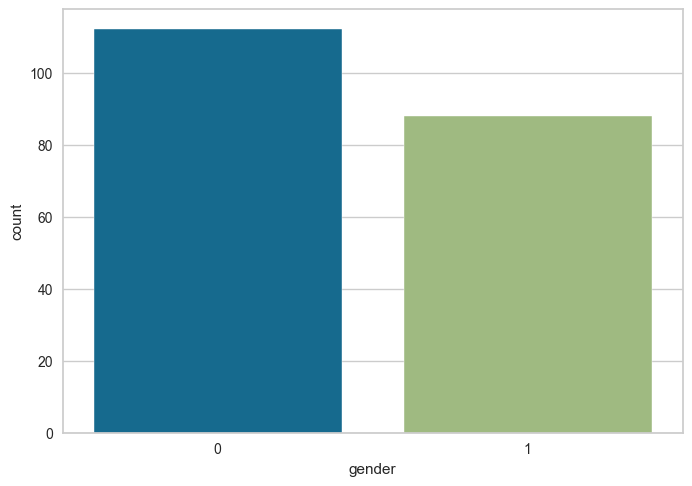

In [13]:
sns.countplot(df.gender)
plt.show()

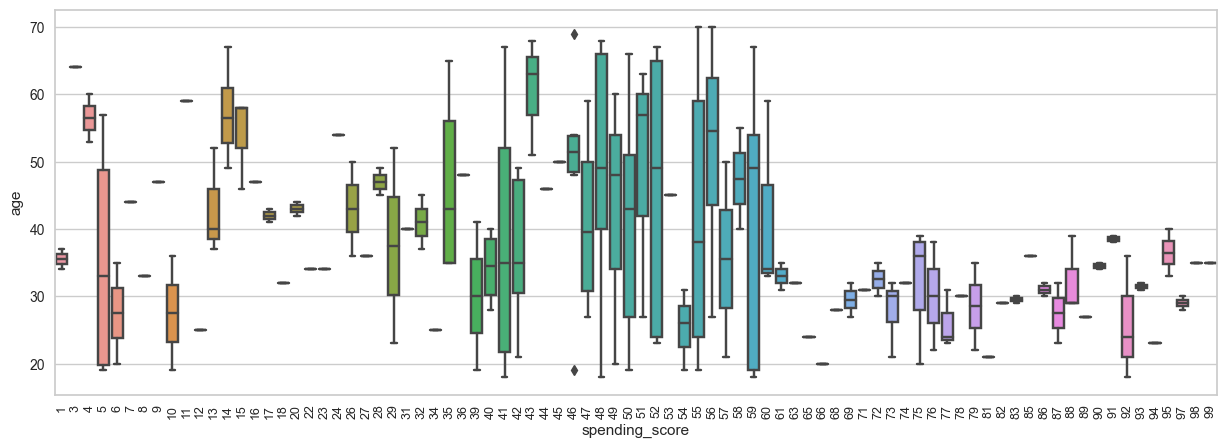

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x = df.spending_score, y = df.age);
plt.xticks(rotation = 90, fontsize = (9));

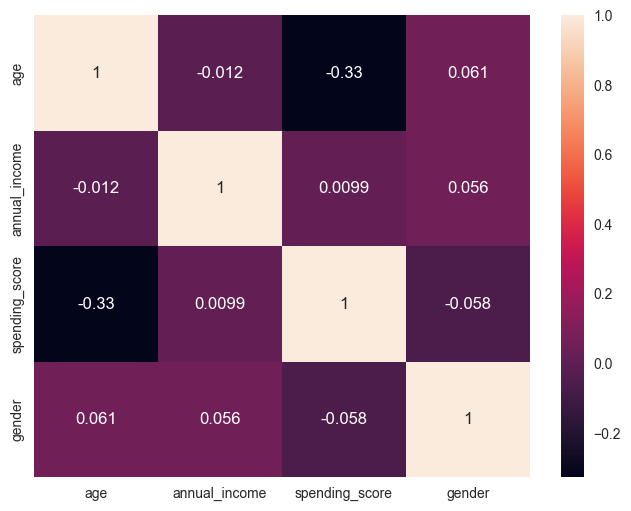

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True);

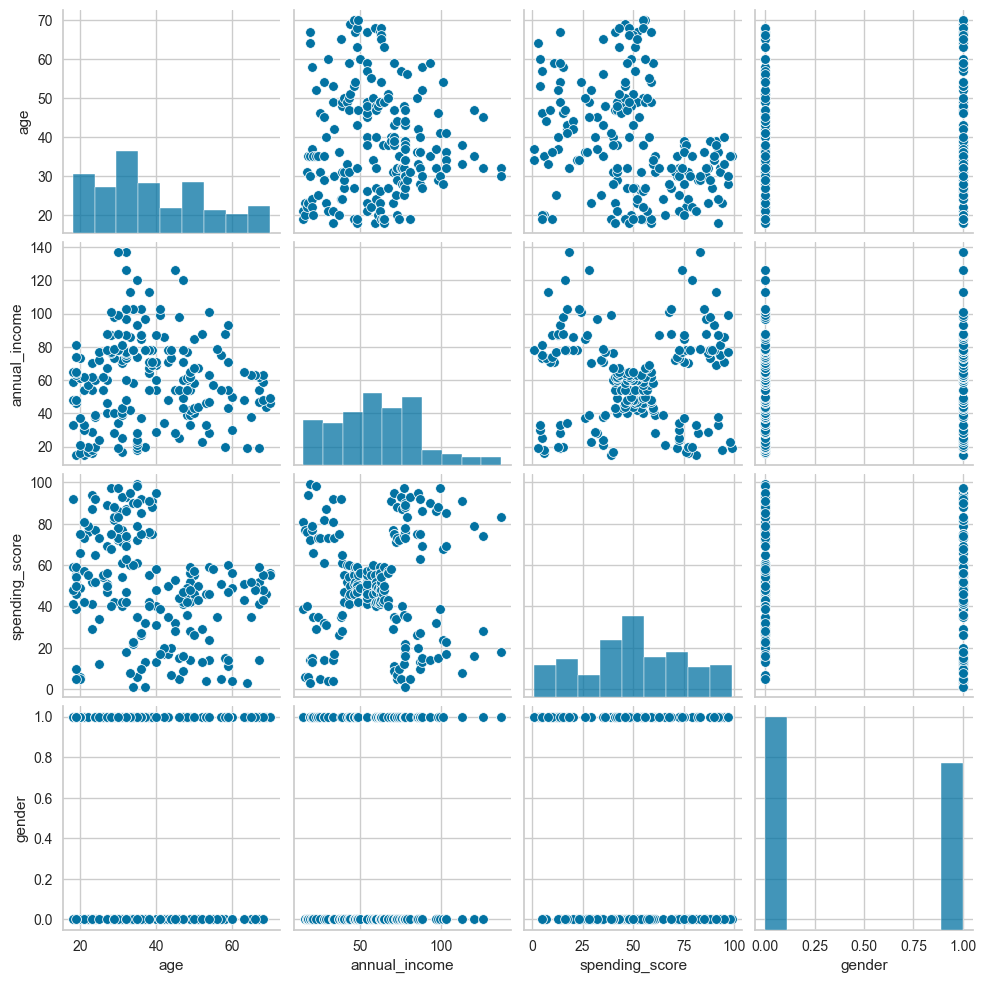

In [16]:
sns.pairplot(df)
plt.show()

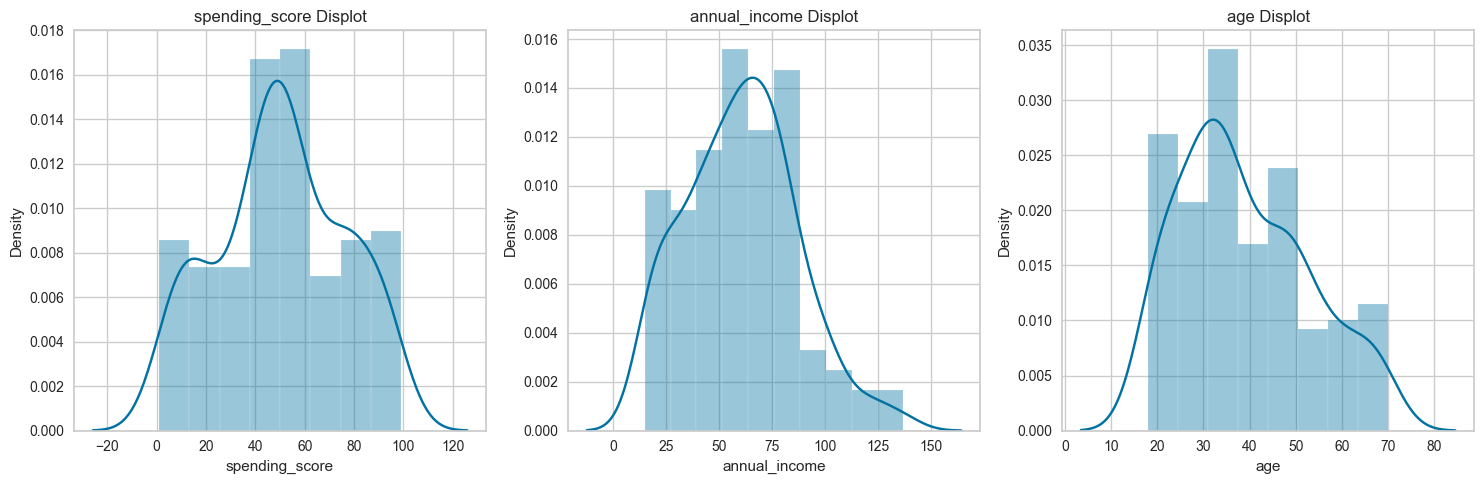

In [17]:
plt.figure(figsize=(15, 5))

# Sütunlar listesi
columns = ['spending_score', 'annual_income', 'age']

# Sütunları döngü ile çizme
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.distplot(df[column])
    plt.title(f'{column} Displot')

# Grafikleri gösterme
plt.tight_layout()
plt.show()

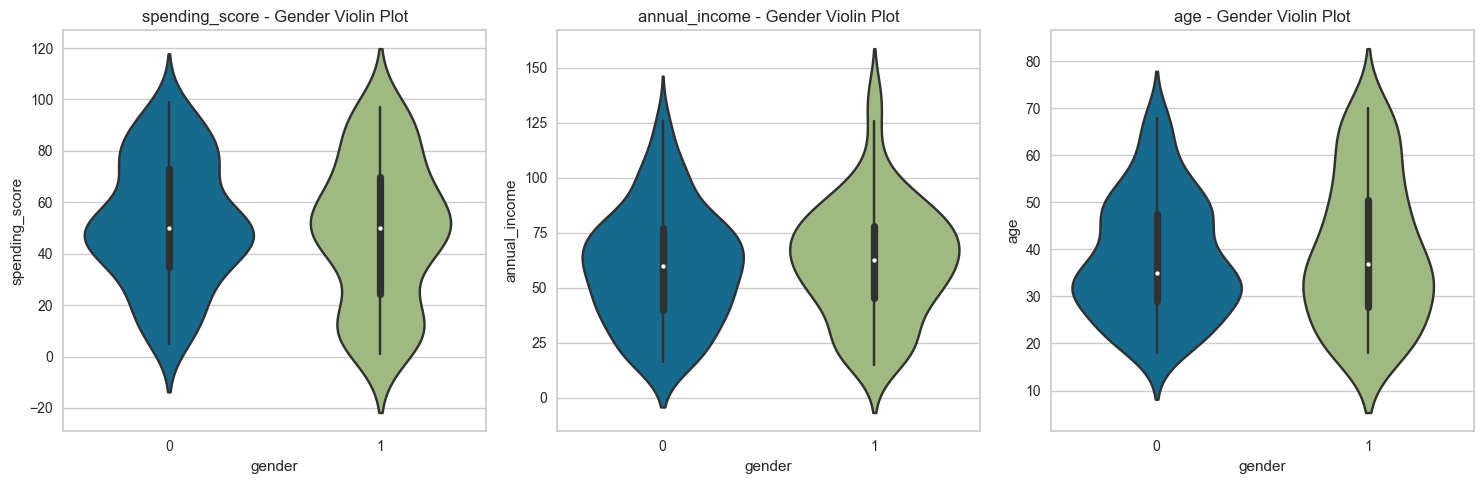

In [18]:
plt.figure(figsize=(15, 5))

# Sütunlar listesi
columns = ['spending_score', 'annual_income', 'age']

# Sütunları döngü ile cinsiyetlere göre violin plot çizimi
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='gender', y=column, data=df, split=True)
    plt.title(f'{column} - Gender Violin Plot')

# Grafikleri gösterme
plt.tight_layout()
plt.show()

## Scaling Data

In [19]:
X = df.copy() # target label olmadığı için datanın hepsini X e veririz ayrıca y olmayacak

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---
---

# Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [21]:
K_means_model = KMeans(n_clusters=4, random_state=42)

In [22]:
K_means_model.fit_predict(X)

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [23]:
X["Classes"] = K_means_model.labels_

In [24]:
X

age  annual_income  spending_score  gender  Classes
0     19             15              39       1        2
1     21             15              81       1        2
2     20             16               6       0        1
3     23             16              77       0        2
4     31             17              40       0        1
..   ...            ...             ...     ...      ...
195   35            120              79       0        3
196   45            126              28       0        0
197   32            126              74       1        3
198   32            137              18       1        0
199   30            137              83       1        3

[200 rows x 5 columns]

## Hopkins test

In [25]:
X = X.drop("Classes", axis =1)

In [26]:
## HOPKINS TEST İÇİN MANUEL KOD

from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [27]:
X.shape

(200, 4)

In [28]:
hopkins(X, X.shape[0]) # test sonucu 0 yakınsa clusters için uygundur 

0.3045600164883538

## Elbow metod

In [29]:
ssd = [] ##inertia

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

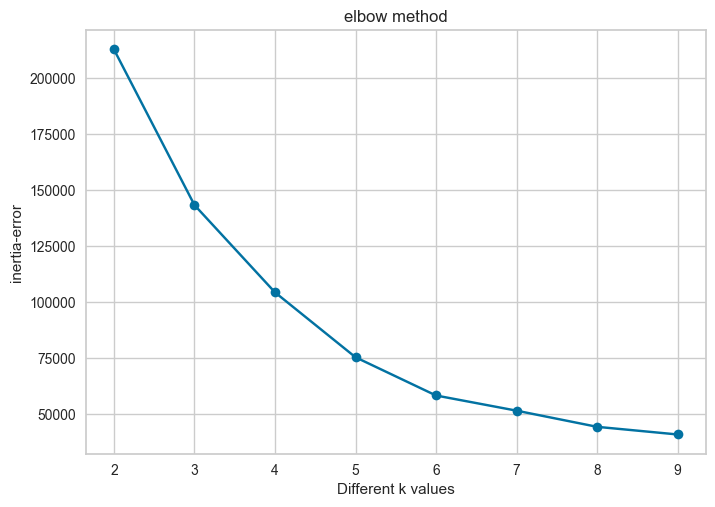

In [30]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [31]:
ssd # sum of squared distance

[212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75427.71182424155,
 58348.64136331505,
 51575.27793107794,
 44359.634641148325,
 40942.511170061174]

In [32]:
pd.Series(ssd).diff() # sadece DataFrame serieste çalışır. index sırasına göre satırların farkını alır. Bu skorlara oransal olarak bakılmalı. Aksi halde yanılırız

0          NaN
1   -69497.850
2   -38976.917
3   -28986.964
4   -17079.070
5    -6773.363
6    -7215.643
7    -3417.123
dtype: float64

In [33]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1       NaN
2 69497.850
3 38976.917
4 28986.964
5 17079.070
6  6773.363
7  7215.643
8  3417.123

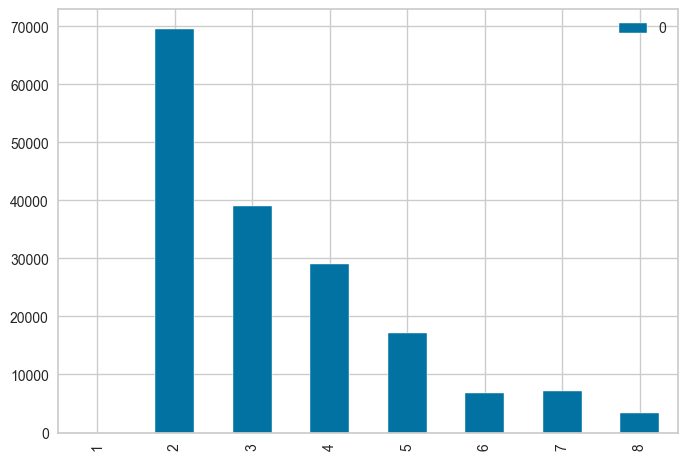

In [34]:
df_diff.plot(kind='bar');

## 2'nci Method n_cluster tespiti için

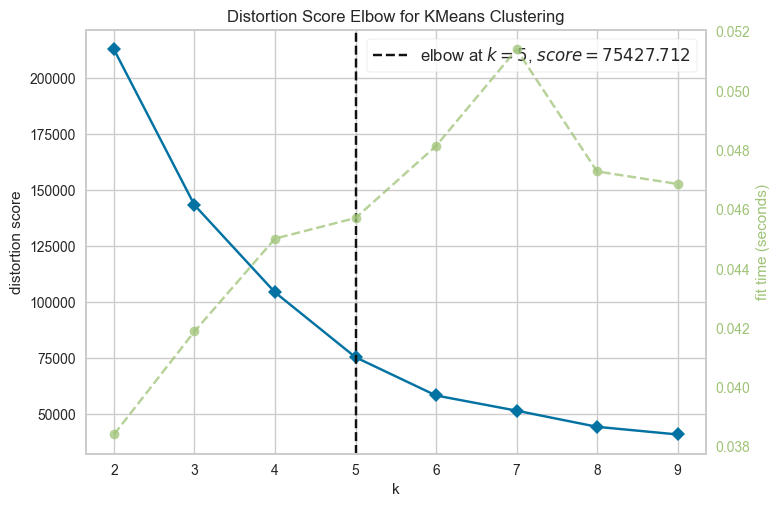

In [35]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [36]:
silhouette_score(X, K_means_model.labels_)

0.4052954330641215

In [37]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.29307334005502633
For n_clusters=3, the silhouette score is 0.383798873822341
For n_clusters=4, the silhouette score is 0.4052954330641215
For n_clusters=5, the silhouette score is 0.44424291275274114
For n_clusters=6, the silhouette score is 0.45205475380756527
For n_clusters=7, the silhouette score is 0.43479758148661335
For n_clusters=8, the silhouette score is 0.4294563708430266


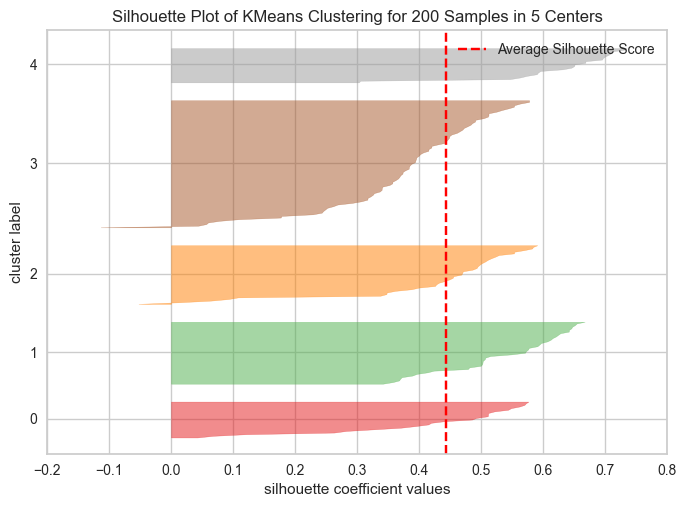

In [38]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

In [39]:
model = KMeans(n_clusters =5, random_state=42)
model.fit_predict(X)

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [40]:
model.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [41]:
clusters = model.labels_

In [42]:
X.head()

age  annual_income  spending_score  gender
0   19             15              39       1
1   21             15              81       1
2   20             16               6       0
3   23             16              77       0
4   31             17              40       0

In [43]:
X["predicted_clusters"] = clusters

In [44]:
X

age  annual_income  spending_score  gender  predicted_clusters
0     19             15              39       1                   0
1     21             15              81       1                   4
2     20             16               6       0                   0
3     23             16              77       0                   4
4     31             17              40       0                   0
..   ...            ...             ...     ...                 ...
195   35            120              79       0                   1
196   45            126              28       0                   2
197   32            126              74       1                   1
198   32            137              18       1                   2
199   30            137              83       1                   1

[200 rows x 5 columns]

## Visualization Clusters

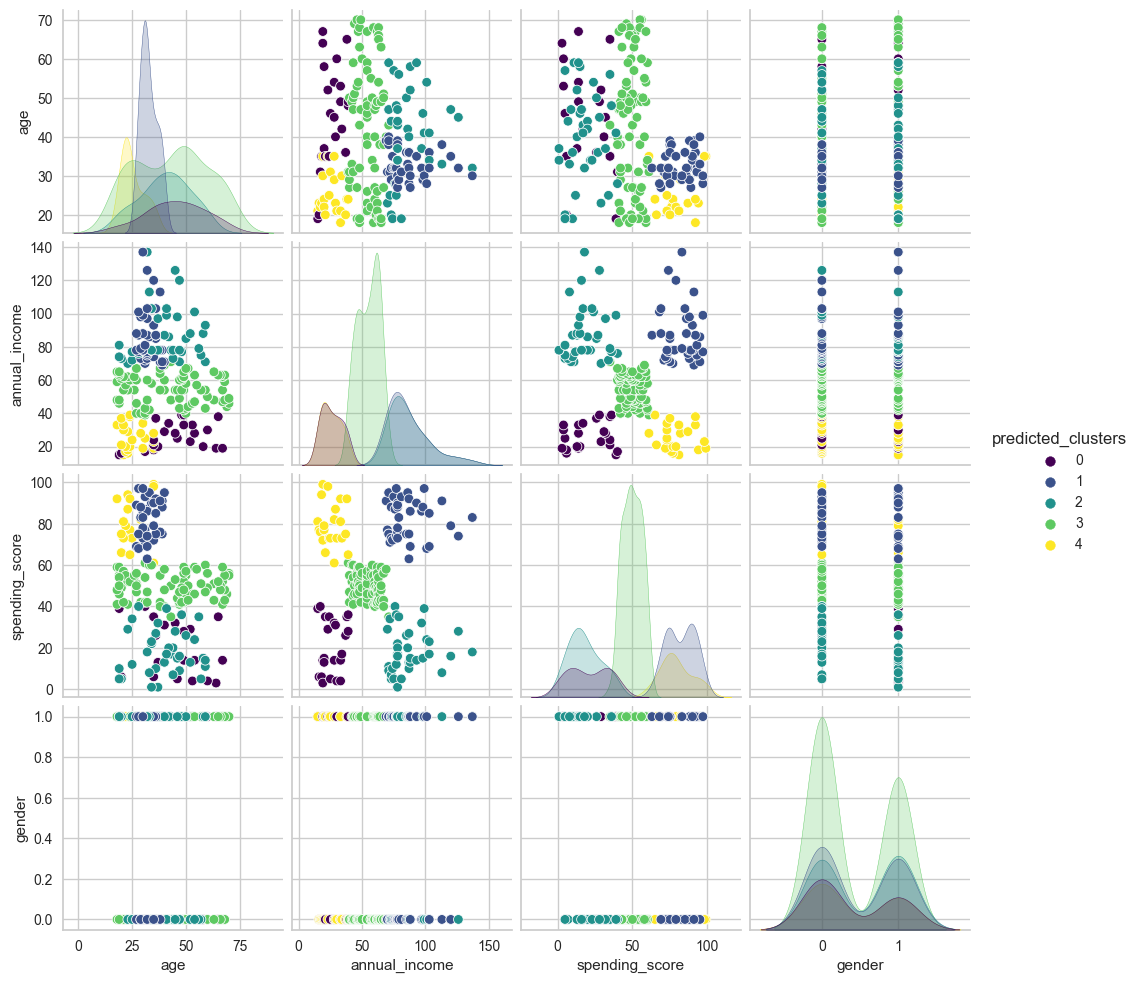

In [45]:
sns.pairplot(X, hue="predicted_clusters", palette="viridis")
plt.show()

In [47]:
centers = model.cluster_centers_ # yataylar feature dikeydekiler küme
centers

array([[45.2173913 , 26.30434783, 20.91304348,  0.39130435],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [40.32432432, 87.43243243, 18.18918919,  0.51351351],
       [43.12658228, 54.82278481, 49.83544304,  0.41772152],
       [25.27272727, 25.72727273, 79.36363636,  0.40909091]])

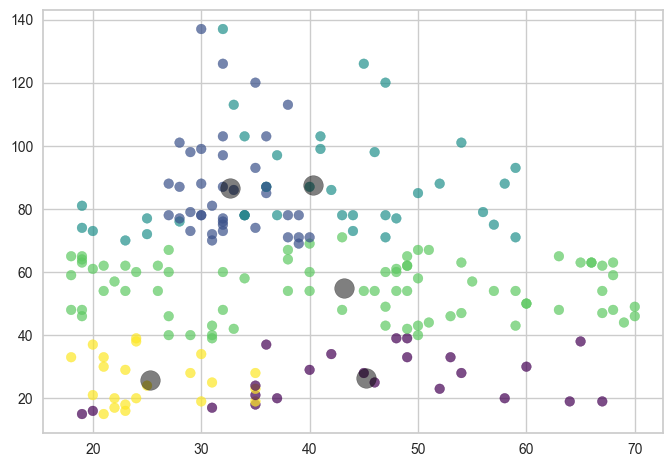

In [48]:
plt.scatter(X["age"], X["annual_income"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Clustering based on Age and Spending Score - X1

In [49]:
clus_pred = X.iloc[:, :-1].groupby(X["predicted_clusters"]).mean().T
clus_pred

predicted_clusters      0      1      2      3      4
age                45.217 32.692 40.324 43.127 25.273
annual_income      26.304 86.538 87.432 54.823 25.727
spending_score     20.913 82.128 18.189 49.835 79.364
gender              0.391  0.462  0.514  0.418  0.409

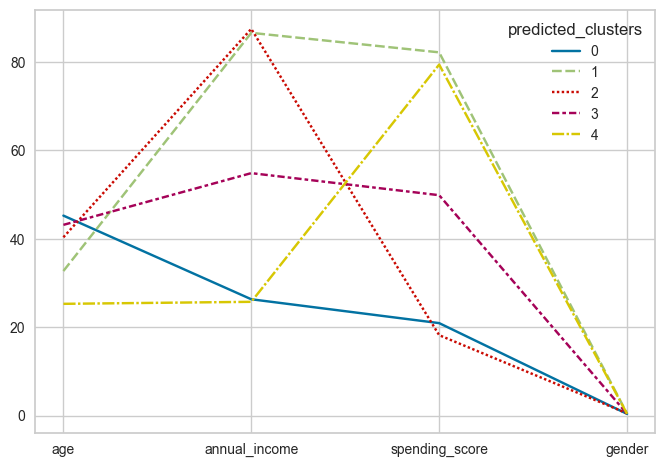

In [50]:
sns.lineplot(data = clus_pred); # karar vermemizde önemli bir görsel

In [51]:
X1 = X.iloc[:, [0,2]]
X1

age  spending_score
0     19              39
1     21              81
2     20               6
3     23              77
4     31              40
..   ...             ...
195   35              79
196   45              28
197   32              74
198   32              18
199   30              83

[200 rows x 2 columns]

## Hopkins test

In [52]:
hopkins(X1, X1.shape[0])

0.3257485160800611

## Elbow metod

In [53]:
ssd = []

K = range(2,10)

for k in K:
    model2 = KMeans(n_clusters =k)
    model2.fit(X1)
    ssd.append(model2.inertia_)

Text(0.5, 1.0, 'elbow method')

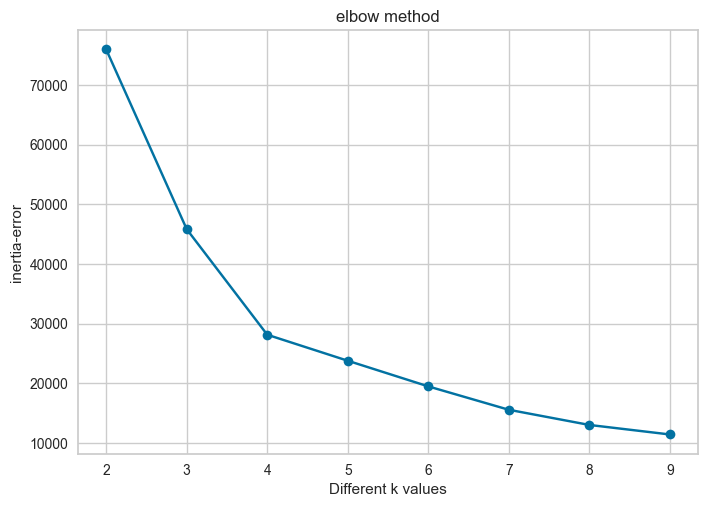

In [54]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [55]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1       NaN
2 30108.479
3 17675.093
4  4355.121
5  4297.166
6  3915.779
7  2541.891
8  1596.121

<AxesSubplot:>

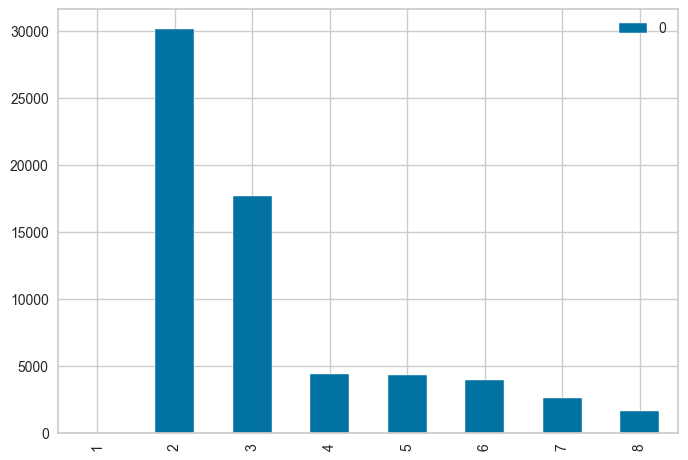

In [56]:
df_diff.plot(kind='bar')

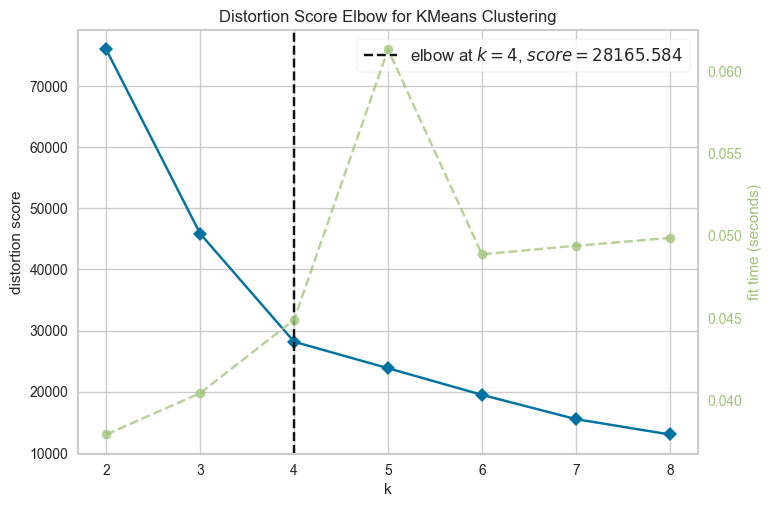

In [57]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [58]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


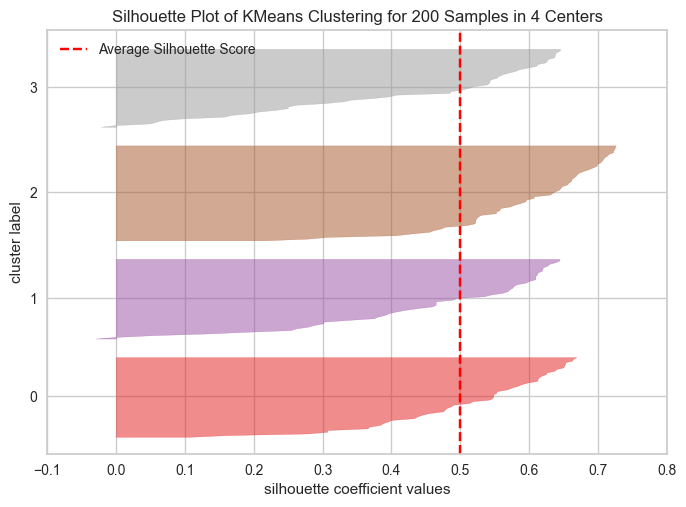

In [59]:
model3 = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

# Clustering based on Annual Income and Age - X2

## Create a new dataset with two variables of your choice

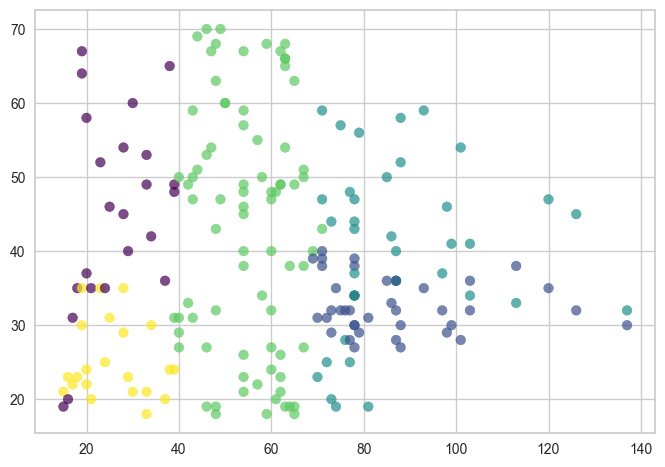

In [60]:
plt.scatter(X["annual_income"], X["age"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7);

In [61]:
X2 = X.iloc[:, [1,0]]
X2

annual_income  age
0               15   19
1               15   21
2               16   20
3               16   23
4               17   31
..             ...  ...
195            120   35
196            126   45
197            126   32
198            137   32
199            137   30

[200 rows x 2 columns]

## Hopkins test

In [62]:
hopkins(X2, X2.shape[0])

0.3280948944622525

In [63]:
ssd = []

K = range(2,10)

for k in K:
    model4 = KMeans(n_clusters =k)
    model4.fit(X2)
    ssd.append(model4.inertia_)

## Elbow metod

Text(0.5, 1.0, 'elbow method')

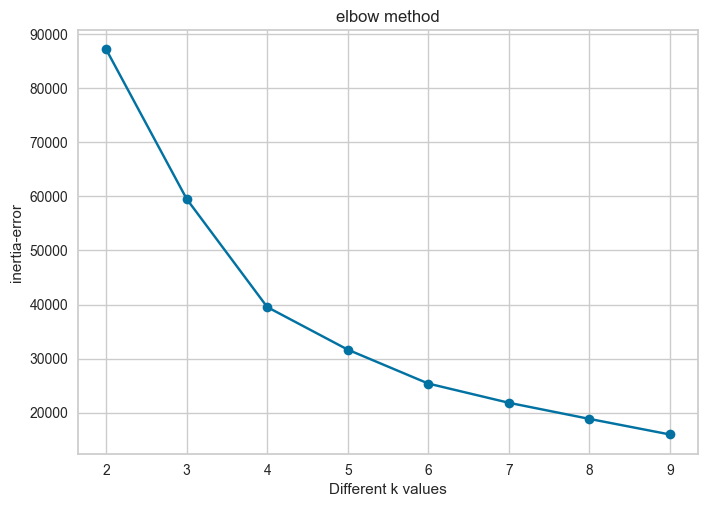

In [64]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [65]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1       NaN
2 27634.604
3 19957.073
4  7867.476
5  6263.390
6  3549.253
7  2976.300
8  2880.234

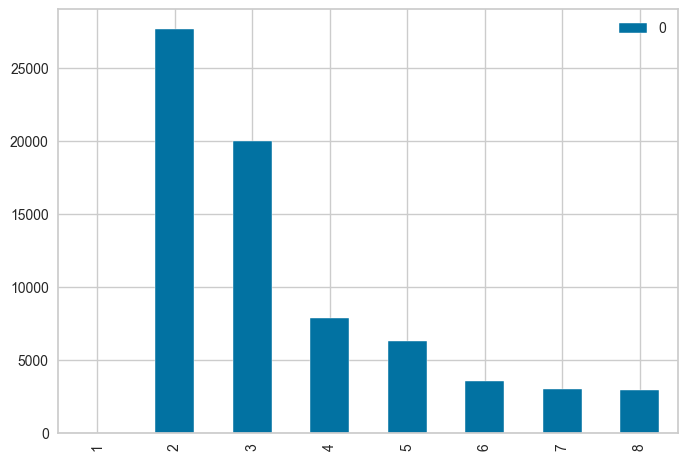

In [66]:
df_diff.plot(kind='bar');

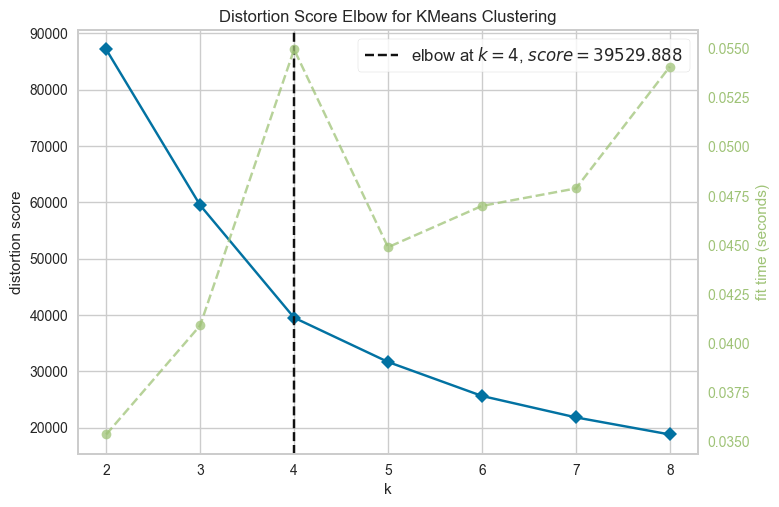

In [67]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [68]:
## Silhouette analysisrange_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.42620850066216065
For n_clusters=3, the silhouette score is 0.4254725038202792
For n_clusters=4, the silhouette score is 0.43295184273333076
For n_clusters=5, the silhouette score is 0.4016436644787277
For n_clusters=6, the silhouette score is 0.39293552436103246
For n_clusters=7, the silhouette score is 0.3840192204022327
For n_clusters=8, the silhouette score is 0.3945566831270063


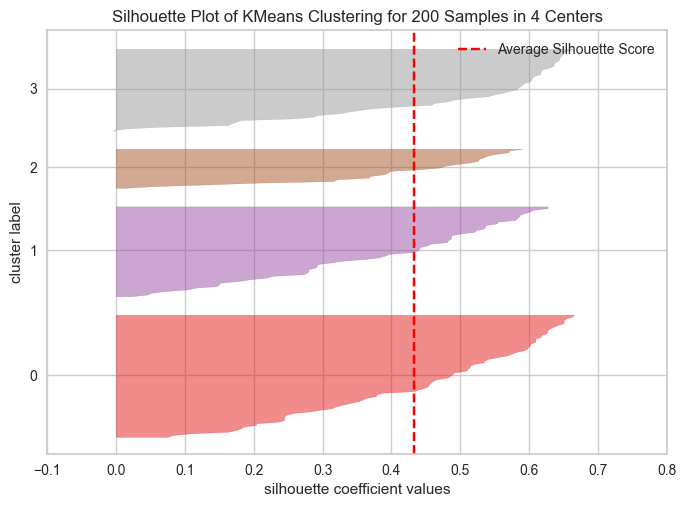

In [69]:
model4 = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

# Why silhouette_score is negative?

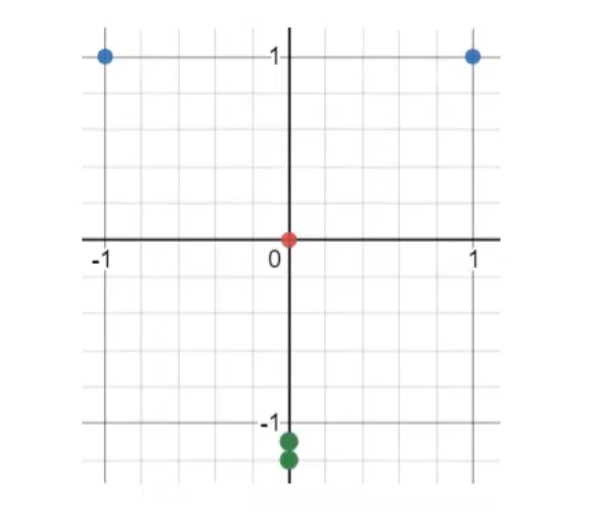

__Silhouette Score-->__ (1-√2) / √2 = -0.29

* Pozitif değerler, veri noktalarının doğru kümelere yerleştirildiği ve farklı kümeleme grupları arasında iyi bir ayrım olduğunu gösterir.
* 0 değeri, veri noktalarının çakışan bölgelere yerleştirildiğini veya yaklaşık olarak eşit uzaklıklarla birden fazla küme içinde bulunduğunu gösterir.
* Negatif değerler ise, veri noktalarının yanlış kümelere yerleştirildiği ve diğer kümeleme grupları arasında daha iyi bir ayrım yapmanın mümkün olduğunu gösterir.

# Clustering based on Annual Income and Spending Score - X3

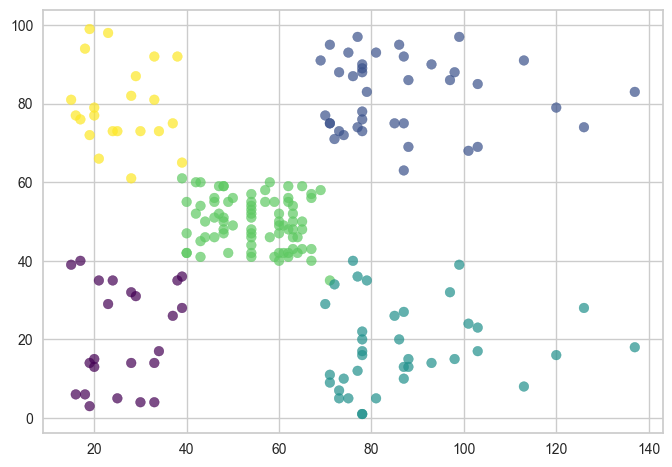

In [70]:
plt.scatter(X["annual_income"], X["spending_score"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7);

In [71]:
X3 = X.iloc[:, [1,2]]
X3

annual_income  spending_score
0               15              39
1               15              81
2               16               6
3               16              77
4               17              40
..             ...             ...
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83

[200 rows x 2 columns]

## Hopkins test

In [72]:
hopkins(X3, X3.shape[0])

0.2910917796474644

In [73]:
ssd = []

K = range(2,10)

for k in K:
    model5 = KMeans(n_clusters =k)
    model5.fit(X3)
    ssd.append(model5.inertia_)

## Elbow metod

Text(0.5, 1.0, 'elbow method')

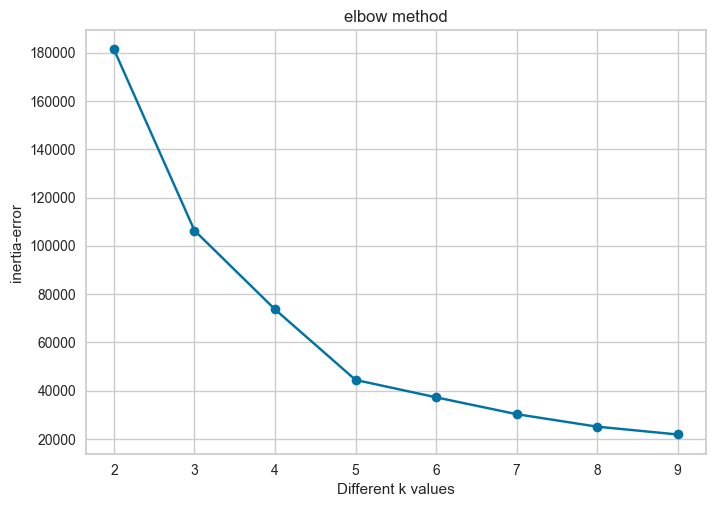

In [74]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [75]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1       NaN
2 75015.223
3 32668.584
4 29231.334
5  7214.641
6  6974.157
7  5179.890
8  3240.903

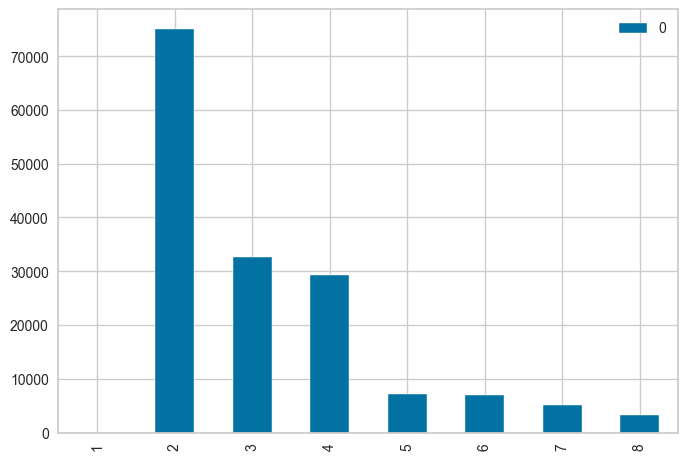

In [76]:
df_diff.plot(kind='bar');

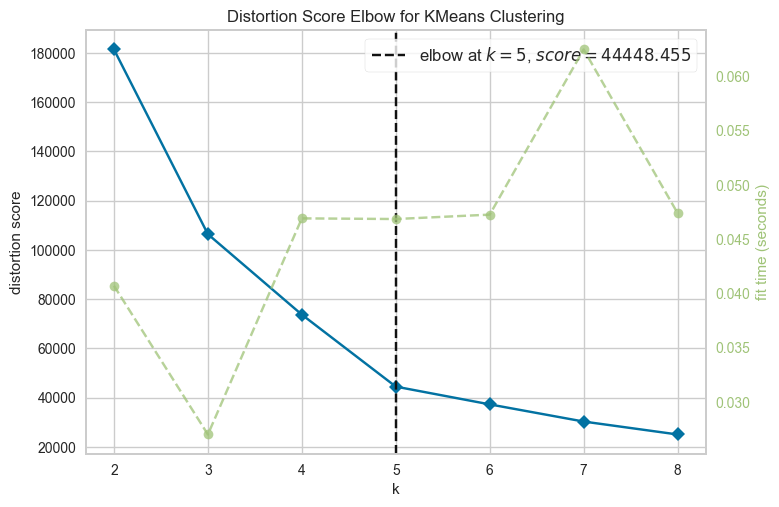

In [77]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X3)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [78]:
## Silhouette analysisrange_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


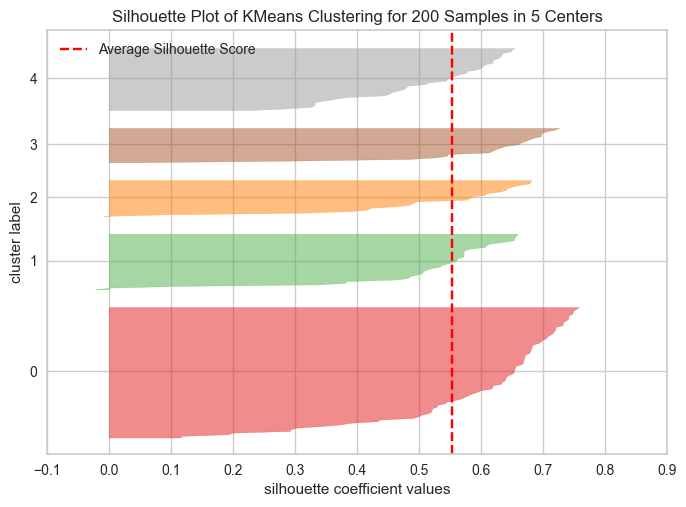

In [79]:
model5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X3)    # Fit the data to the visualizer
visualizer.poof();

# Determine optimal number of clusters

In [80]:
final_model = KMeans(n_clusters =4, random_state=42)
final_model.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [81]:
X1["predicted_clusters"] = final_model.labels_

In [82]:
X1.head()

age  spending_score  predicted_clusters
0   19              39                   3
1   21              81                   2
2   20               6                   1
3   23              77                   2
4   31              40                   3

# Hierarchical Clustering

In [83]:
X = df.copy()
X.head()

age  annual_income  spending_score  gender
0   19             15              39       1
1   21             15              81       1
2   20             16               6       0
3   23             16              77       0
4   31             17              40       0

In [84]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

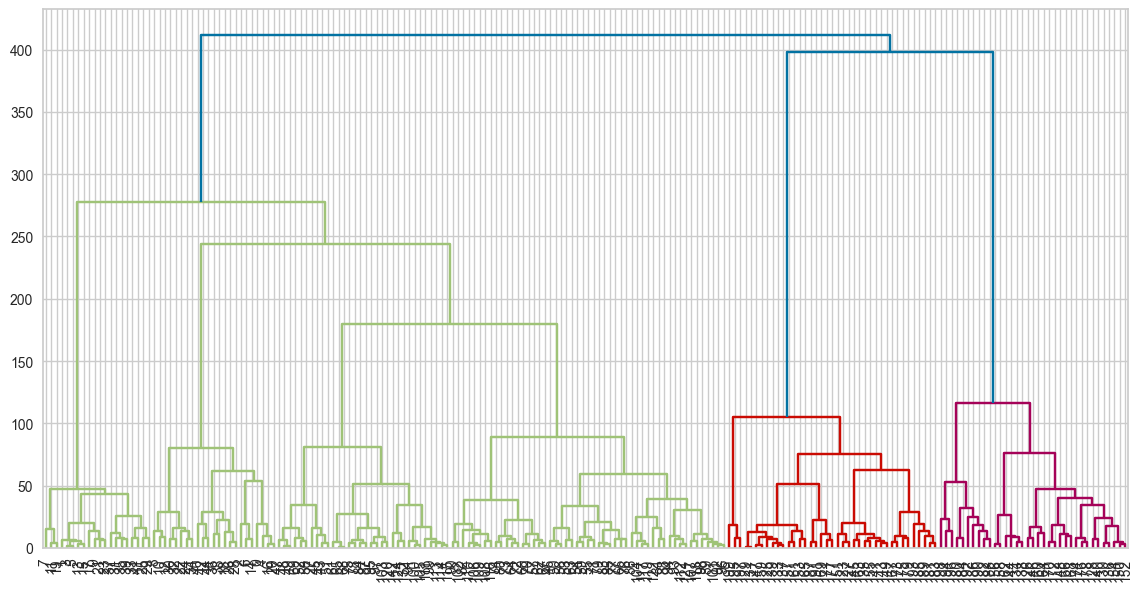

In [85]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

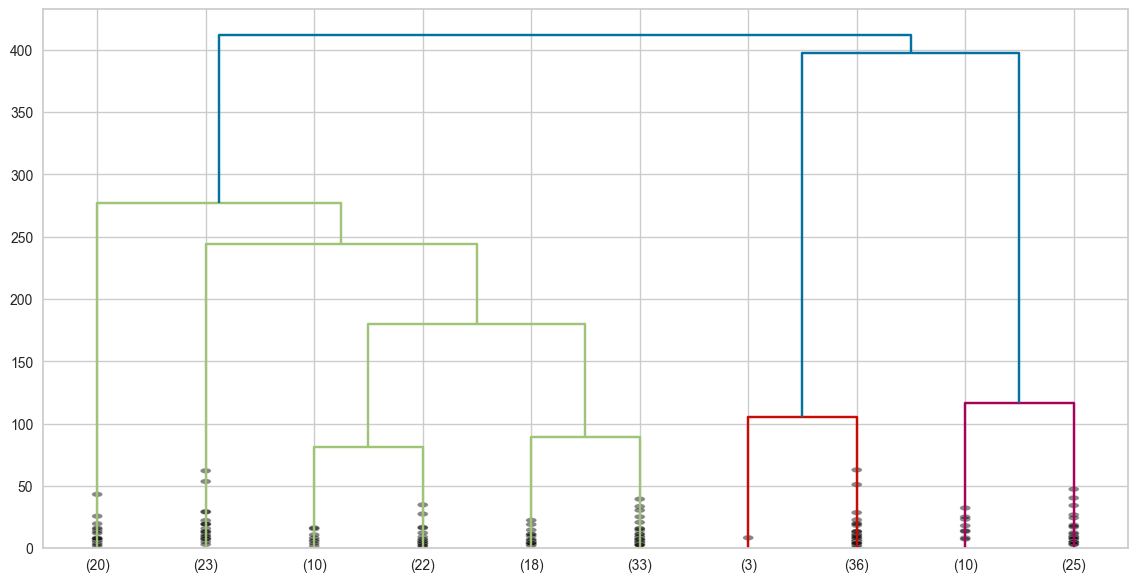

In [86]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

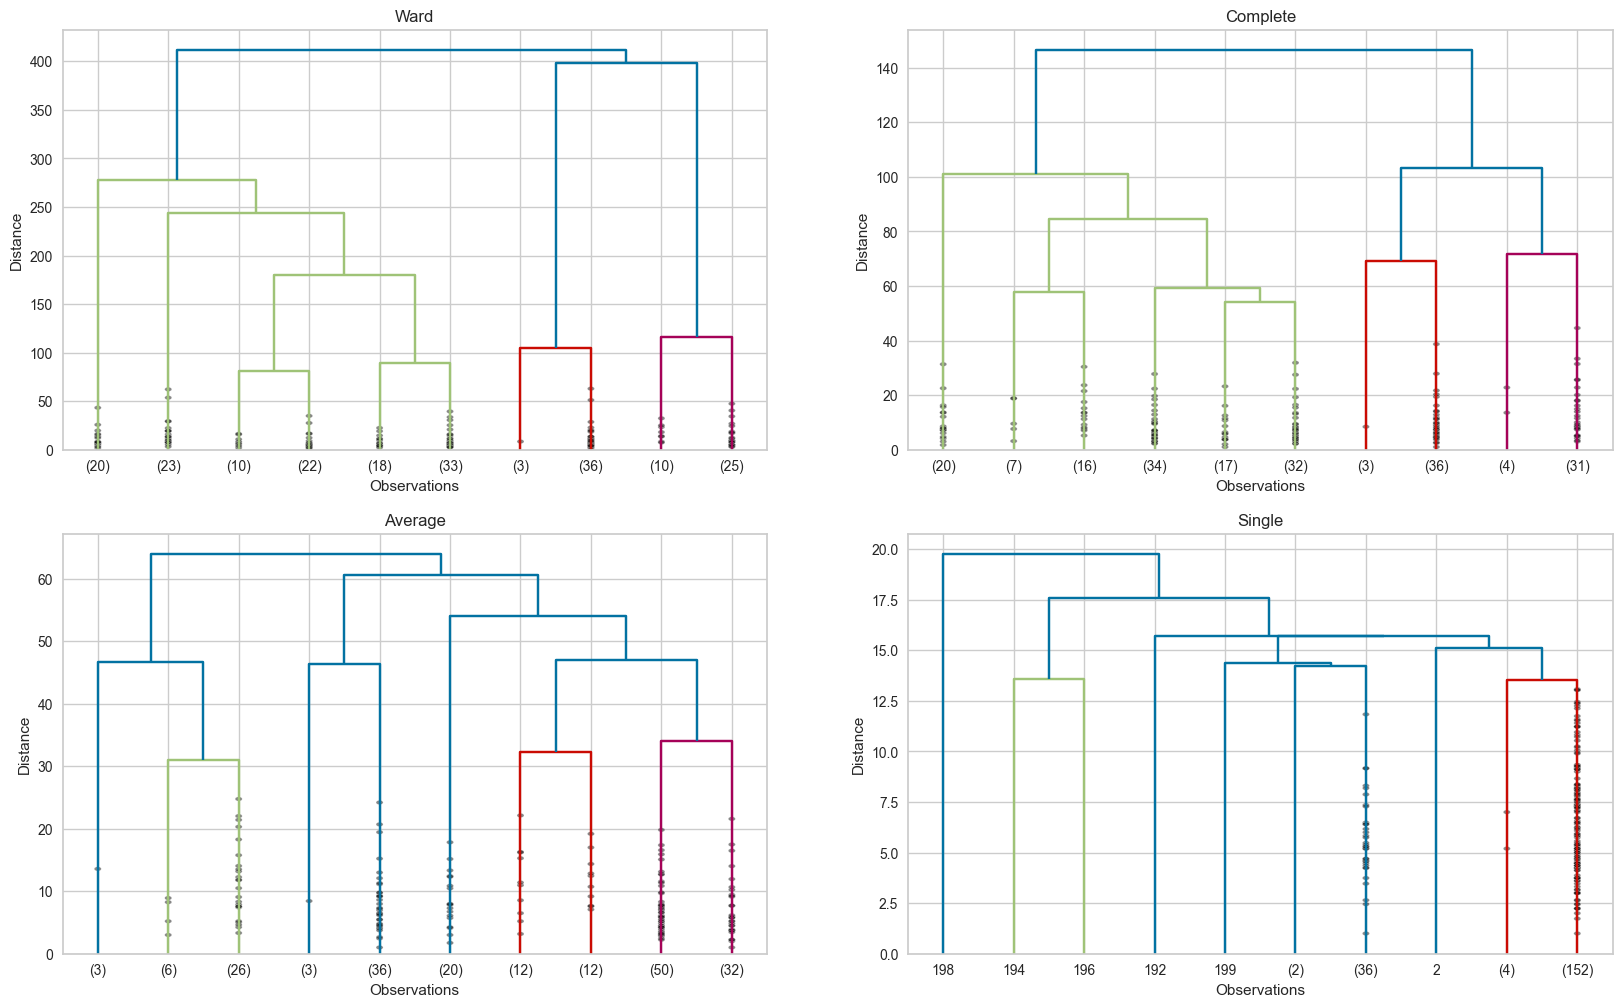

In [87]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

## Apply Agglomerative Clustering

In [88]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.29916602844367
Silhouette Score for 3 clusters: 0.3812859576468096
Silhouette Score for 4 clusters: 0.4102091359195185
Silhouette Score for 5 clusters: 0.43997527212476695
Silhouette Score for 6 clusters: 0.4428008535928764
Silhouette Score for 7 clusters: 0.42593881050851595
Silhouette Score for 8 clusters: 0.4223297424559345
Silhouette Score for 9 clusters: 0.37773214836148283
Silhouette Score for 10 clusters: 0.3612629591916317


In [89]:
model1 =  AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage = "ward") 
model1.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [90]:
model1.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

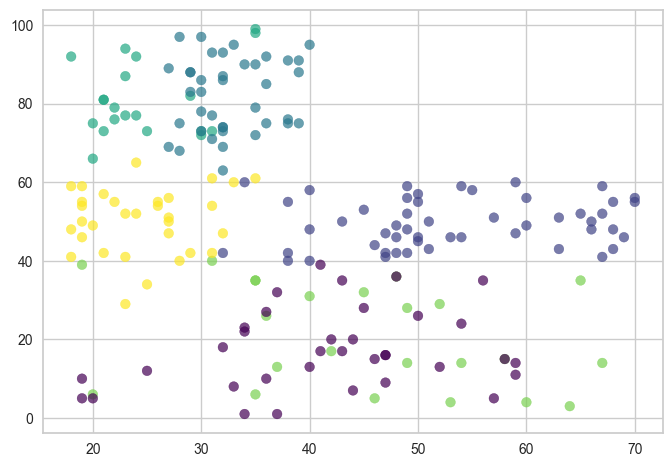

In [91]:
plt.scatter(X["age"], X["spending_score"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

In [92]:
clusters = model1.labels_

In [93]:
df["predicted_clusters"] = clusters
df.head()

age  annual_income  spending_score  gender  predicted_clusters
0   19             15              39       1                   4
1   21             15              81       1                   3
2   20             16               6       0                   4
3   23             16              77       0                   3
4   31             17              40       0                   4

In [94]:
X["predict_clusters"] = clusters
X

age  annual_income  spending_score  gender  predict_clusters
0     19             15              39       1                 4
1     21             15              81       1                 3
2     20             16               6       0                 4
3     23             16              77       0                 3
4     31             17              40       0                 4
..   ...            ...             ...     ...               ...
195   35            120              79       0                 2
196   45            126              28       0                 0
197   32            126              74       1                 2
198   32            137              18       1                 0
199   30            137              83       1                 2

[200 rows x 5 columns]

In [95]:
clus_pred = X.groupby("predict_clusters").mean().T
clus_pred

predict_clusters      0      1      2      3      4      5
age              41.686 53.216 32.692 24.850 45.217 24.531
annual_income    88.229 55.118 86.538 24.950 26.304 54.188
spending_score   17.286 49.471 82.128 81.000 20.913 50.250
gender            0.571  0.412  0.462  0.400  0.391  0.375

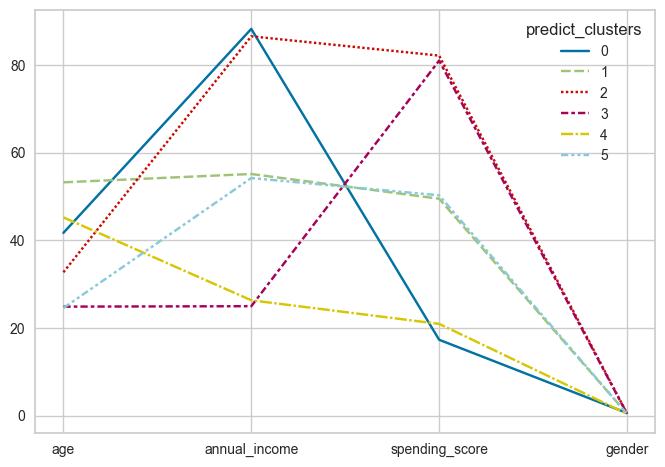

In [96]:
sns.lineplot(data = clus_pred);

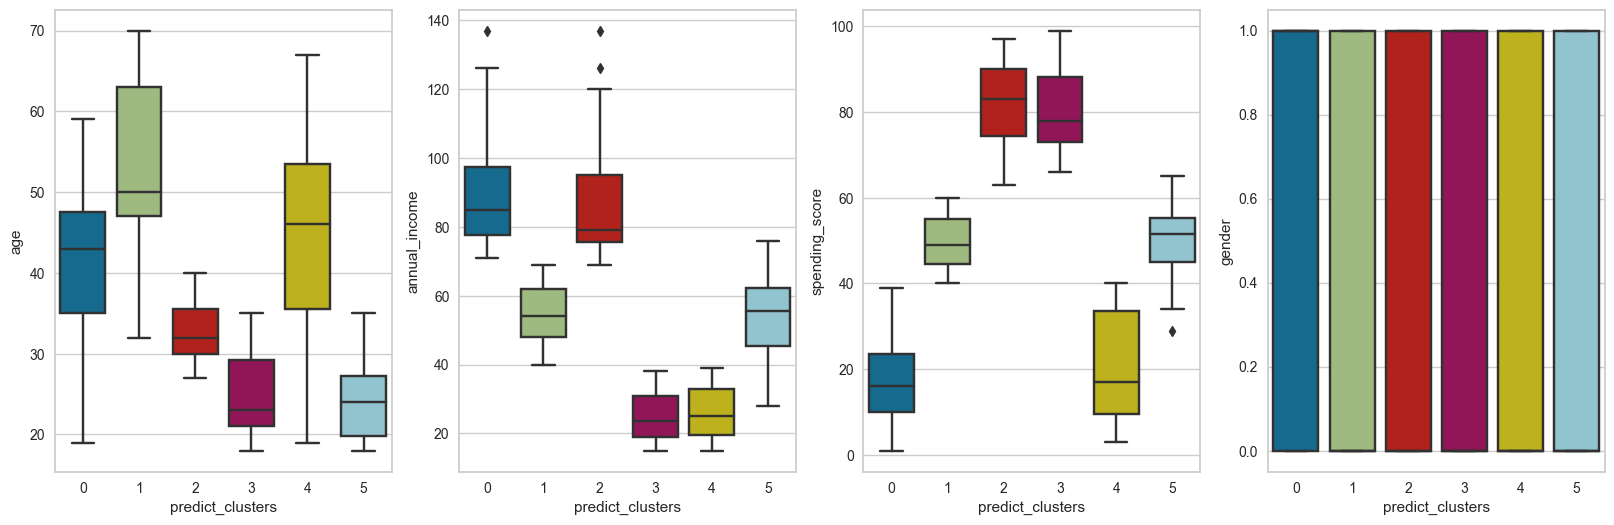

In [97]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "age", x = "predict_clusters", data = X)

plt.subplot(142)
sns.boxplot(y = "annual_income", x = "predict_clusters", data = X)

plt.subplot(143)
sns.boxplot(y = "spending_score", x = "predict_clusters", data = X)

plt.subplot(144)
sns.boxplot(y = "gender", x = "predict_clusters", data = X);

## Clustering based on Age and Spending Score- X2

In [98]:
X2 = X.iloc[:, [0,2]]
X2.head()

age  spending_score
0   19              39
1   21              81
2   20               6
3   23              77
4   31              40

## Dendrogram

In [99]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

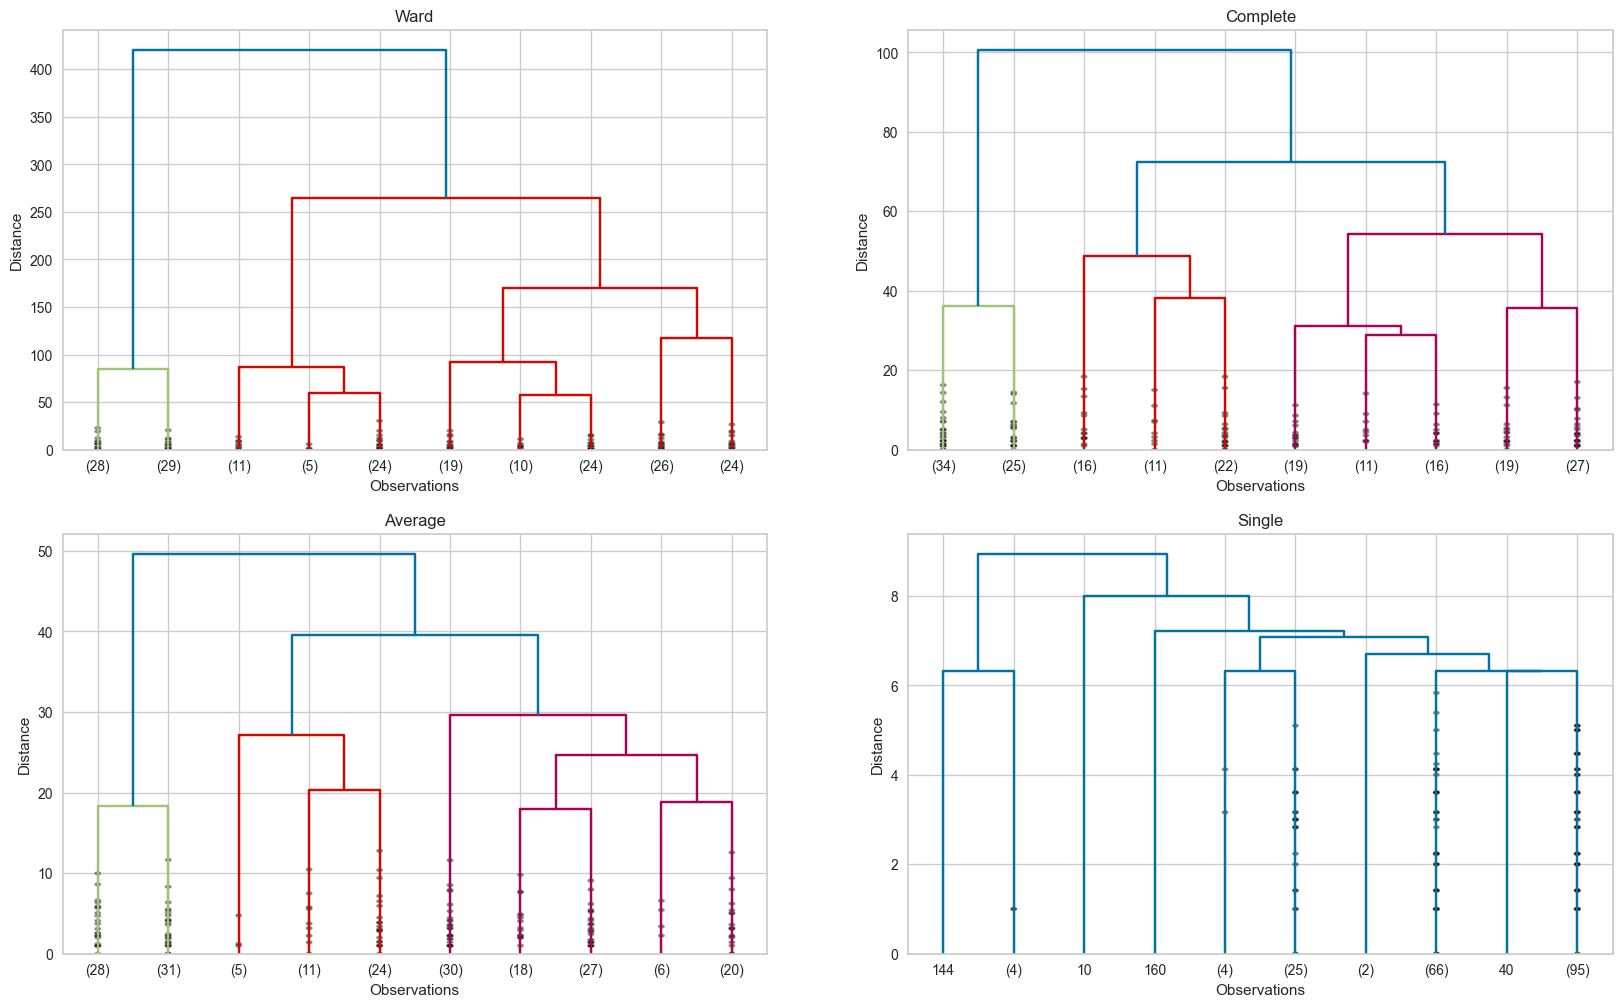

In [100]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [101]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091
Silhouette Score for 10 clusters: 0.3876666104778445


In [102]:
final_model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X2)
X2["predict_clusters"] = clusters

In [103]:
X2.predict_clusters.value_counts()

3    57
1    53
0    50
2    40
Name: predict_clusters, dtype: int64

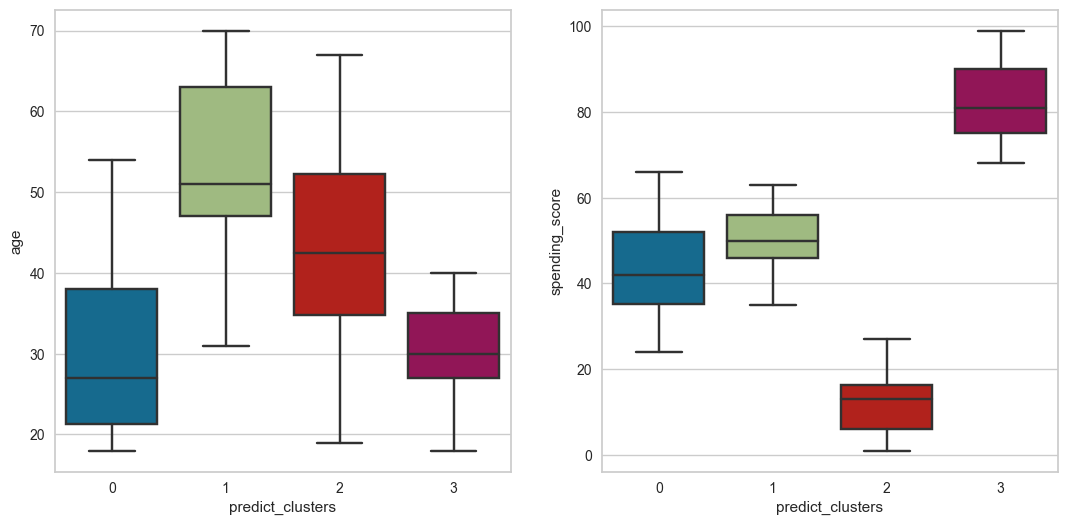

In [106]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "age", x = "predict_clusters", data = X2)

plt.subplot(132)
sns.boxplot(y = "spending_score", x = "predict_clusters", data = X2)

plt.show()

## Clustering based on Annual Income and Spending Score- X3

In [107]:
X3 = X.iloc[:, [1,2]]
X3.head()

annual_income  spending_score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40

## Dendrogram

In [108]:
hc_ward = linkage(y = X3, method = "ward")
hc_complete = linkage(X3, "complete")
hc_average = linkage(X3, "average")
hc_single = linkage(X3, "single")

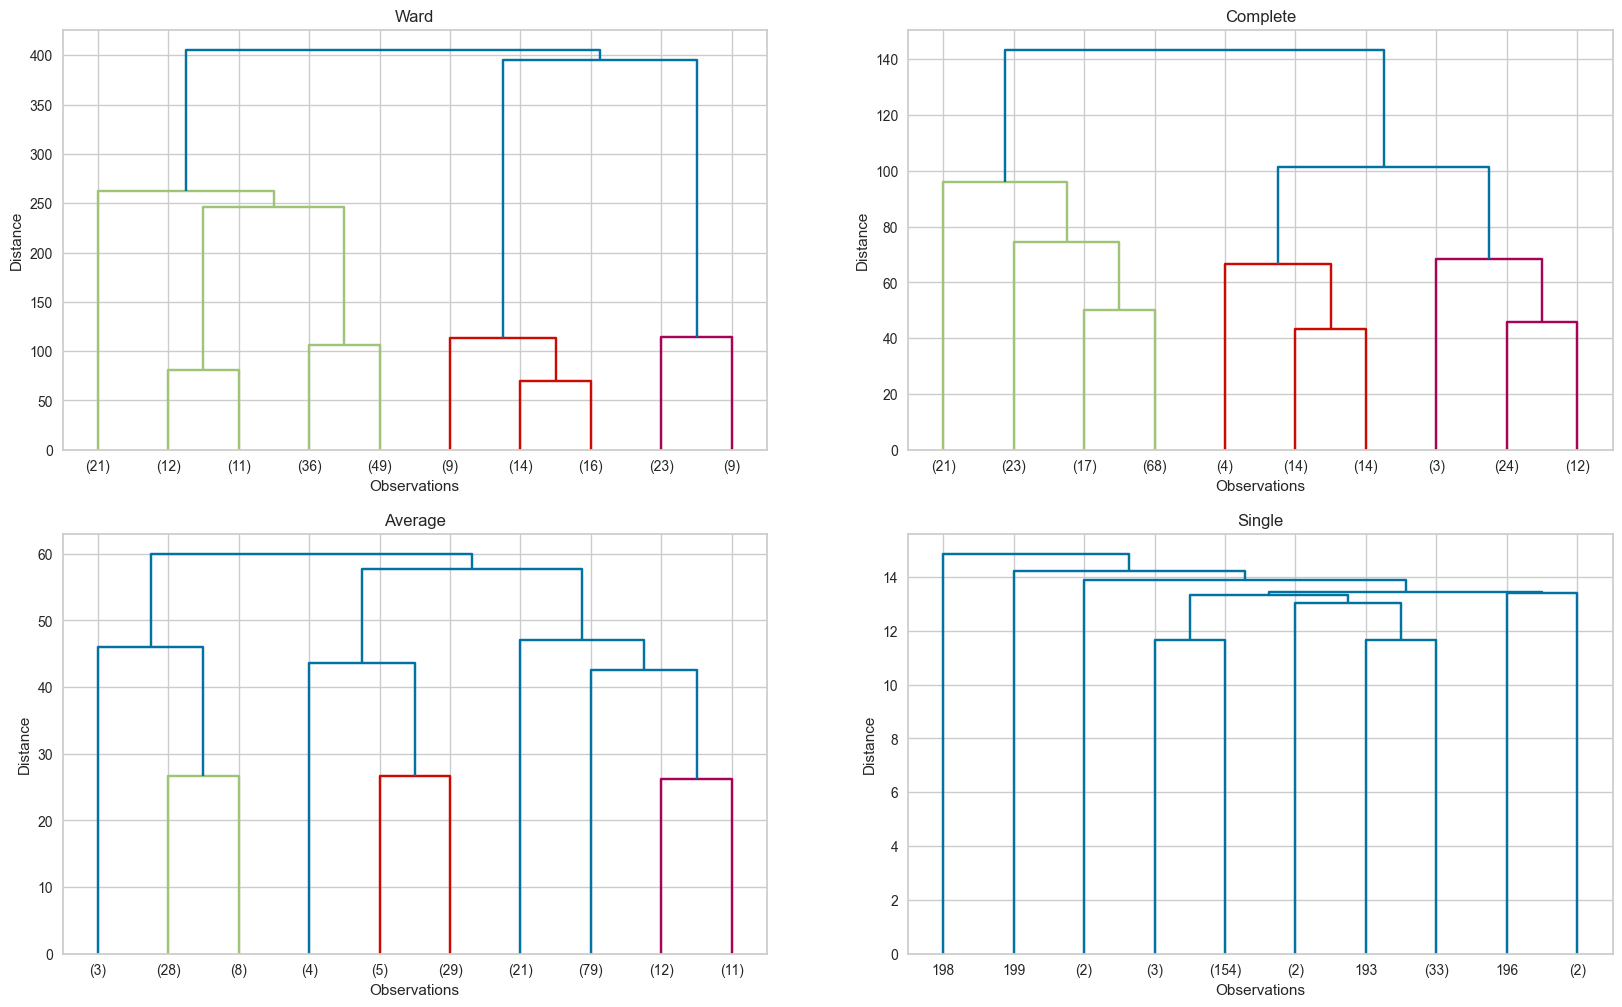

In [109]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [110]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X3, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [118]:
final_model_x3 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = final_model_x3.fit_predict(X3)
X3["predict_clusters"] = clusters

In [119]:
X3.predict_clusters.value_counts()

1    85
2    39
0    32
4    23
3    21
Name: predict_clusters, dtype: int64

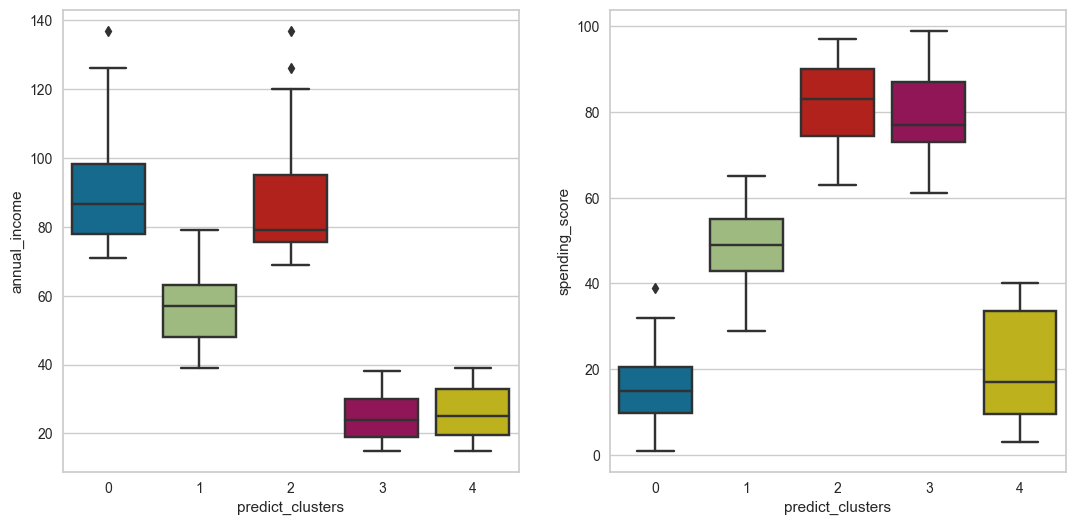

In [120]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "annual_income", x = "predict_clusters", data = X3)

plt.subplot(132)
sns.boxplot(y = "spending_score", x = "predict_clusters", data = X3)

plt.show()

## Conclusion

Alışveriş merkezi müşterilerinin alışveriş merkezinde yaptıkları alışverişlere göre genel olarak 5 gruba ayrılabileceğini görebiliriz.

**Orta gelirli, orta harcama yapan müşteriler (0)**: Bu küme, finansal olarak istikrarlı olan ancak lüks mal ve hizmetlere yapılan harcamalara öncelik vermeyebilecek müşterileri temsil edebilir. Bu kişiler mağazaların veya avm'nin öncelikli hedefleri olmayacak, ancak yine dikkate alınacak ve avm'nin uygulayacağı indirim vb. imkanlarla harcama puanları artırılabilir.

**Yüksek gelirli, düşük harcama yapan müşteriler (1)**: Bu küme, finansal olarak güvende olan ancak paralarını biriktirmeyi veya lüks ürünler yerine pratik ihtiyaçlara harcamayı tercih eden müşterileri temsil edebilir. Belki de bunlar alışveriş merkezinin hizmetlerinden memnun olmayan veya mutsuz olan insanlardır. Bunlar, para harcama potansiyeline sahip oldukları için alışveriş merkezinin başlıca hedefleri olabilir. Böylece AVM yetkilileri, bu insanları cezbedebilmeleri ve ihtiyaçlarını karşılayabilmeleri için yeni kolaylıklar sunabilir.

**Yüksek gelirli, yüksek harcama yapan müşteriler (2)**: Bu küme, finansal olarak rahat olan ve lüks mal ve hizmetlere para harcamaktan hoşlanan müşterileri temsil edebilir. Bu insanlar başlıca kar kaynakları olduğu için alışveriş merkezi veya dükkanlar için ideal durum budur. Bu kişiler alışveriş merkezinin düzenli müşterileri olabilir ve alışveriş merkezinin hizmetinden veya ürünlerden memnun olan kişilerdir.

**Düşük gelirli, yüksek harcama yapan müşteriler (3)**: Bu küme, sınırlı finansal kaynaklara sahip olsalar bile gelirlerinin önemli bir bölümünü sahip oldukları mal ve hizmetlere harcamak isteyen müşterileri temsil edebilir. Belki de bu insanlar alışveriş merkezi hizmetlerinden fazlasıyla memnun oldukları içindir. Mağazalar / alışveriş merkezleri bu insanları etkili bir şekilde hedef almayabilir, ancak yine de onları kaybetmeyecektir.

**Düşük gelirli, düşük harcama yapan müşteriler (4)**: Bu küme, gerekliliği gerekse kişisel tercihi nedeniyle para tasarrufu yapmaya ve harcamalarını en aza indirmeye daha fazla odaklanan müşterileri temsil edebilir.  Mağazalar / alışveriş merkezi en az bu kümeye mensup kişilerle ilgilenecektir.